### Demographics API

Below we have the code that retrieves the data from the  Mechanical Turk Tracker Demographics API.

In [1]:
!sudo -H pip install -U pip

Requirement already up-to-date: pip in /usr/local/lib/python3.5/dist-packages


In [2]:
!sudo -H pip install -U pandas

Requirement already up-to-date: pandas in /usr/local/lib/python3.5/dist-packages
Requirement already up-to-date: python-dateutil>=2 in /usr/local/lib/python3.5/dist-packages (from pandas)
Requirement already up-to-date: pytz>=2011k in /usr/local/lib/python3.5/dist-packages (from pandas)
Requirement already up-to-date: numpy>=1.7.0 in /usr/local/lib/python3.5/dist-packages (from pandas)
Requirement already up-to-date: six>=1.5 in /usr/lib/python3/dist-packages (from python-dateutil>=2->pandas)


In [3]:
import pandas as pd
pd.__version__

'0.20.2'

In [4]:
!sudo -H pip install -U numpy

Requirement already up-to-date: numpy in /usr/local/lib/python3.5/dist-packages


In [5]:
import numpy as np
np.__version__

'1.13.0'

In [6]:

df = pd.read_csv("mturk_surveys.csv")
df.drop(df.columns[0], axis=1, inplace=True) # drop the "index" column
# We now transform our API answer into a flat table
# and set the right data types
df["hit_answered_date"]=pd.to_datetime(df["hit_answered_date"])
df["hit_creation_date"]=pd.to_datetime(df["hit_creation_date"])
df["household_income"]=df["household_income"].astype("category")
df["household_size"]=df["household_size"].astype("category")
df["location_country"]=df["location_country"].astype("category")
df["marital_status"]=df["marital_status"].astype("category")
df['date'] = pd.to_datetime(df['hit_answered_date'].apply(lambda x : x.date()))
df['time'] = df['hit_answered_date'].apply(lambda x : x.time())
# df['time'] = map(lambda x : x.time(), df['hit_answered_date'])
df.dtypes

gender                             object
hit_answered_date          datetime64[ns]
hit_creation_date          datetime64[ns]
household_income                 category
household_size                   category
location_city                      object
location_country                 category
location_region                    object
marital_status                   category
post_to_completion_secs           float64
worker_id                          object
year_of_birth                       int64
date                       datetime64[ns]
time                               object
dtype: object

In [7]:
import datetime
import time

minDate = min(df['hit_answered_date'])
maxDate = max(df['hit_answered_date'])

# The following are for setting up the x-axis in the plots that
# show demographics over time
min_x = minDate.toordinal()
max_x = maxDate.toordinal()
ticks = 6
steps = (max_x-min_x)/ticks

days = (maxDate - minDate).days
print(minDate)
print(maxDate)
print(days)

2015-03-26 11:47:28.877000
2017-06-17 02:38:50.413000
813


In [8]:
print(min_x)
print(max_x)

735683
736497


In [9]:
df.head(5)

,gender,hit_answered_date,hit_creation_date,household_income,household_size,location_city,location_country,location_region,marital_status,post_to_completion_secs,worker_id,year_of_birth,date,time
0,female,2017-06-17 02:38:50.413,2017-06-17 02:35:15,"$25,000-$39,999",2,chicago,US,il,married,215.0,abdb4a49fa215a85850ca6b53273f9b6,1961,2017-06-17,02:38:50.413000
1,male,2017-06-17 02:24:05.938,2017-06-17 02:20:13,"$100,000 or more",2,des moines,US,ia,cohabitating,232.0,1e31723e90a79fe2c3028fa9be9cf3c1,1981,2017-06-17,02:24:05.938000
2,female,2017-06-17 02:15:22.549,2017-06-17 01:35:17,"$60,000-$74,999",2,tampa,US,fl,married,2405.0,bf977b75ea523d069c2a1d842d3834cf,1992,2017-06-17,02:15:22.549000
3,female,2017-06-17 02:13:46.783,2017-06-17 02:05:14,"$15,000-$24,999",3,wilmington,US,de,single,512.0,9fb008169ac71be7b23798754c4432f4,1995,2017-06-17,02:13:46.783000
4,male,2017-06-17 02:03:30.117,2017-06-17 01:50:17,"$40,000-$59,999",2,latrobe,US,pa,cohabitating,793.0,17cf9f32fdf07181fb90d63352a3ce5e,1986,2017-06-17,02:03:30.117000


### Exploratory plots

In [10]:
!sudo -H pip3 install -U matplotlib

Requirement already up-to-date: matplotlib in /usr/local/lib/python3.5/dist-packages
Requirement already up-to-date: pytz in /usr/local/lib/python3.5/dist-packages (from matplotlib)
Requirement already up-to-date: numpy>=1.7.1 in /usr/local/lib/python3.5/dist-packages (from matplotlib)
Requirement already up-to-date: pyparsing!=2.0.0,!=2.0.4,!=2.1.2,!=2.1.6,>=1.5.6 in /usr/local/lib/python3.5/dist-packages (from matplotlib)
Requirement already up-to-date: six>=1.10 in /usr/lib/python3/dist-packages (from matplotlib)
Requirement already up-to-date: python-dateutil in /usr/local/lib/python3.5/dist-packages (from matplotlib)
Requirement already up-to-date: cycler>=0.10 in /usr/local/lib/python3.5/dist-packages (from matplotlib)


In [11]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.__version__

'2.0.2'

In [12]:
!sudo -H pip3 install -U seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.5/dist-packages
Requirement already up-to-date: scipy in /usr/local/lib/python3.5/dist-packages (from seaborn)
Requirement already up-to-date: numpy>=1.8.2 in /usr/local/lib/python3.5/dist-packages (from scipy->seaborn)


In [13]:
import seaborn as sns
sns.__version__

'0.7.1'

In [14]:
sns.set_style("whitegrid")
mpl.rc("figure", figsize=(16, 8))
mpl.rcParams.update({'font.size': 22})

#### Countries of the workers

In [15]:
# Let's see the top countries
country = df['location_country'].value_counts() / len(df)

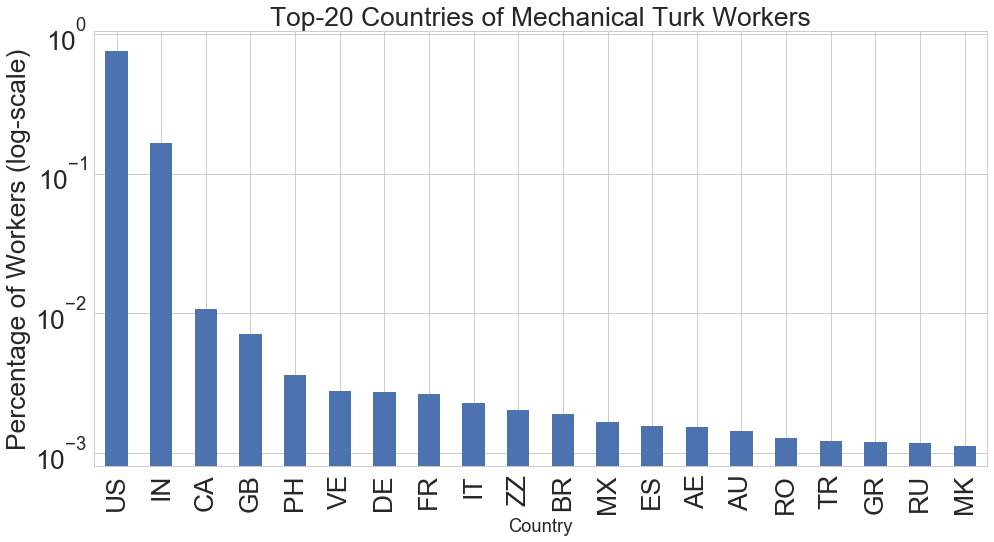

In [16]:
ax = country.head(20).plot.bar(logy=True, fontsize='large')
ax.set_title("Top-20 Countries of Mechanical Turk Workers", fontsize='large')
ax.set_xlabel("Country", fontsize='small')
ax.set_ylabel("Percentage of Workers (log-scale)", fontsize='large')
fig = ax.get_figure()
fig.savefig('plots/countries.pdf', bbox_inches='tight')

In [17]:
country_table = pd.crosstab(index=df.date, columns=df.location_country, 
                            values='worker_id', aggfunc=np.count_nonzero, normalize='index')
# country_table

In [18]:
def time_plot(data, title, filename, confidence=True, legend=False):
        # Compute the mean, and the 10%, 25%, 75%, and 90% percentile
    # Values calculated over a rolling 30-day window
    # Plot lines are smoothed using a 7-day exponential weighted window
    m = data.rolling(window=30).mean().ewm(span=7).mean()
    s1 = data.rolling(window=30).quantile(quantile=0.25).ewm(span=7).mean()
    s2 = data.rolling(window=30).quantile(quantile=0.75).ewm(span=7).mean()
    #s3 = country_table['US'].rolling(window=30).quantile(quantile=0.1).ewm(span=7).mean()
    #s4 = country_table['US'].rolling(window=30).quantile(quantile=0.9).ewm(span=7).mean()

    ax = m.plot(fontsize='small')
    if confidence:
        ax = s1.plot(fontsize='small', color='#bbbbff', linestyle = '--', ax = ax)
        ax = s2.plot(fontsize='small', color='#bbbbff', linestyle = '--', ax = ax)
    #ax = s3.plot(fontsize='small', color='#eeeeff', linestyle = '--', ax = ax)
    #ax = s4.plot(fontsize='small', color='#eeeeff', linestyle = '--', ax = ax)

    ax.set_title(title, fontsize='large')
    ax.set_ylabel("Percentage", fontsize='small')
    ax.set_xlabel("Date", fontsize='small')
    
    if legend:
        ax.legend( fontsize='small', fancybox=True, frameon = True)
        

    #ax.xaxis.set_ticks(np.arange(min_x, max_x, steps))
    #ax.yaxis.set_ticks(np.arange(0.55, 0.91, 0.05))
    fig = ax.get_figure()
    fig.savefig(filename, bbox_inches='tight')
    
    return ax


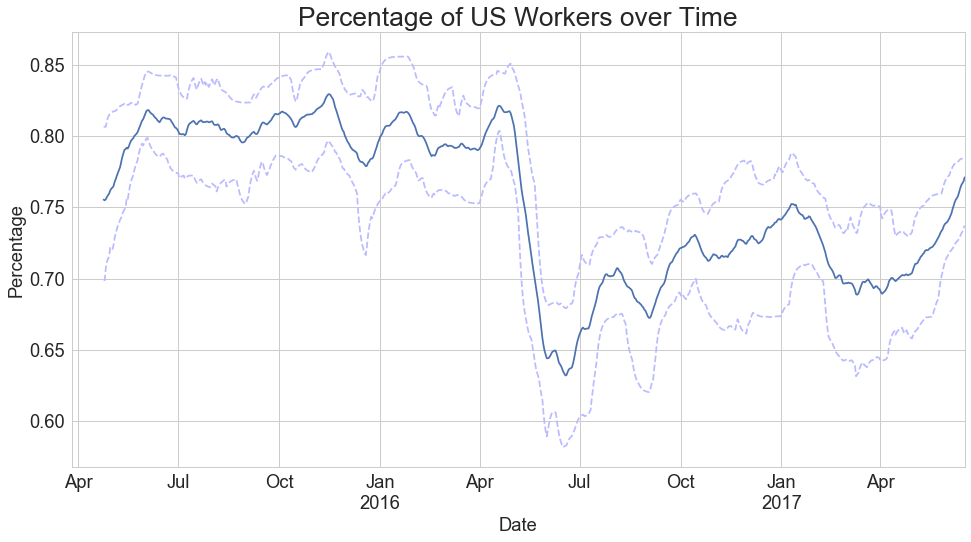

In [19]:
time_plot(country_table['US'], 'Percentage of US Workers over Time', 'plots/country-us.pdf')

In [20]:
country_table_time = pd.crosstab(index=df.time, 
                                 columns=df.location_country, 
                                 values='worker_id', 
                                 aggfunc=np.count_nonzero, 
                                 normalize='index')
country_table_time.sort_index(inplace=True)

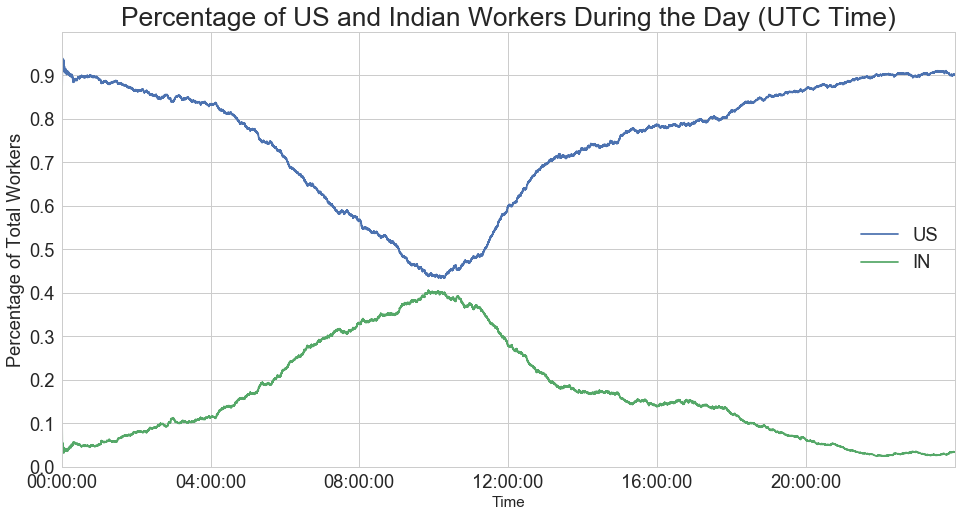

In [21]:
m = country_table_time[['US','IN']].ewm(span=3600).mean()

ax = m.plot( fontsize='small', xlim=[0,86400], ylim=[0,1])
ax.set_title("Percentage of US and Indian Workers During the Day (UTC Time)", fontsize='large')
ax.set_ylabel("Percentage of Total Workers", fontsize='small')
ax.set_xlabel("Time", fontsize='x-small')
ax.xaxis.set_ticks(np.arange(0, 84400, 14400))
ax.yaxis.set_ticks(np.arange(0, 1, 0.1))
ax.legend( fontsize='small')
fig = ax.get_figure()
fig.savefig('plots/country-usa-india-time-of-day.pdf')

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  after removing the cwd from sys.path.


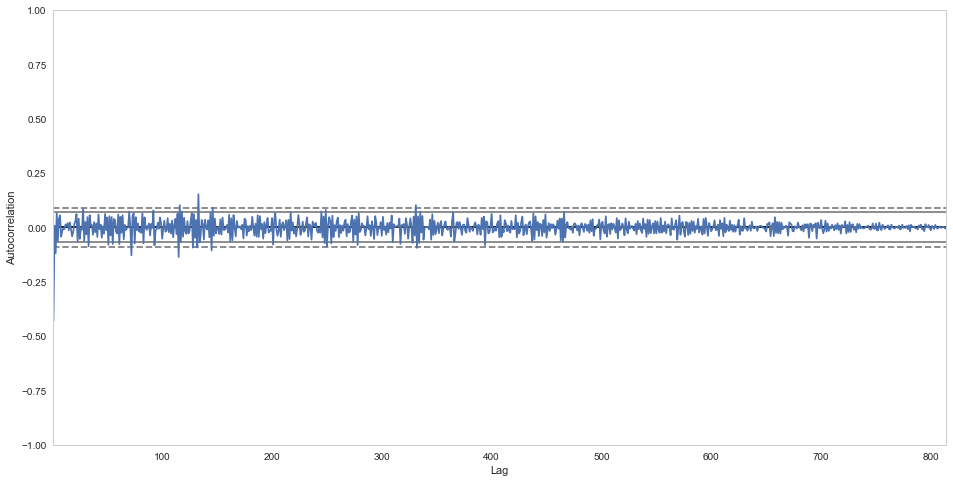

In [22]:
# No significant periodicity
from pandas.tools.plotting import autocorrelation_plot
data = country_table['US'].ewm(span=1).mean().diff()[1:]
autocorrelation_plot(data)

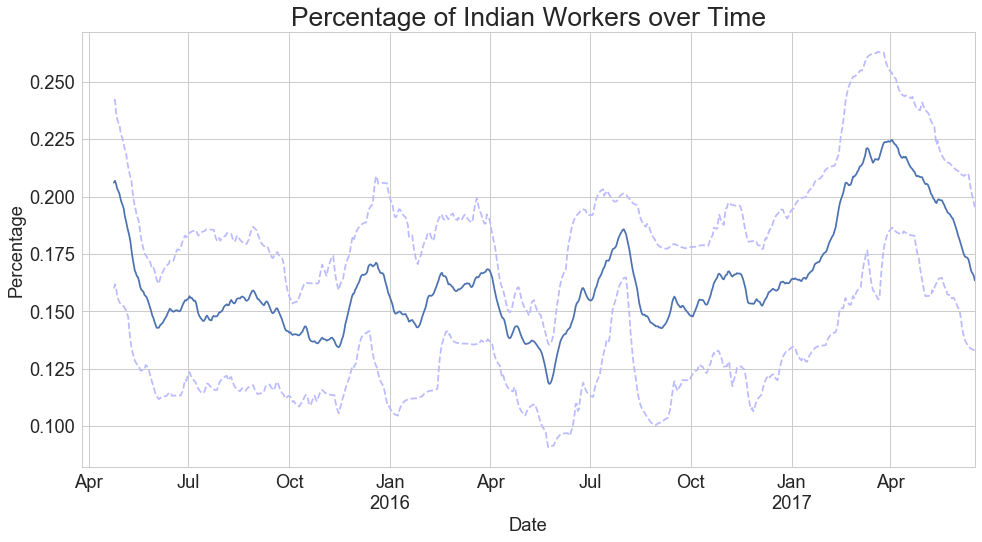

In [23]:
time_plot(country_table['IN'], 
          'Percentage of Indian Workers over Time', 
          'plots/country-india.pdf')

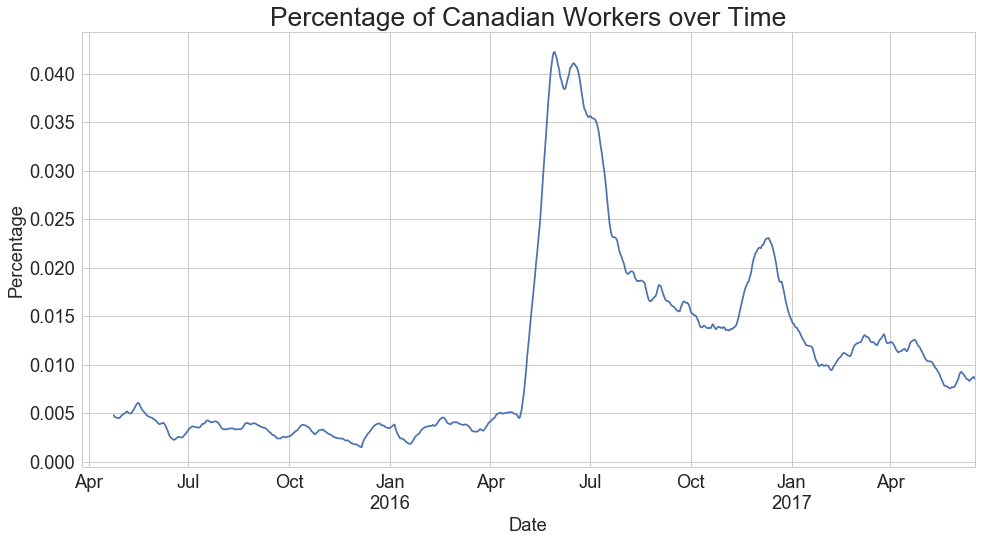

In [24]:
time_plot(data = country_table['CA'], 
          title = 'Percentage of Canadian Workers over Time', 
          filename = 'plots/country-canada.pdf', 
          confidence=False)

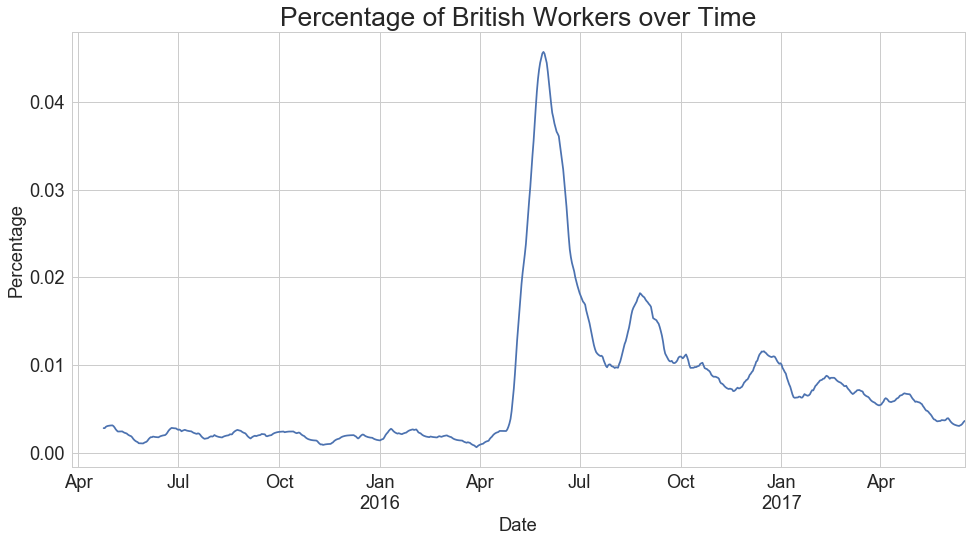

In [25]:
time_plot(data = country_table['GB'], 
          title = 'Percentage of British Workers over Time', 
          filename = 'plots/country-uk.pdf', 
          confidence=False)

## Gender

In [26]:
gender_table = pd.crosstab(index=df.date, columns=df.gender, 
                            values='worker_id', aggfunc=np.count_nonzero, normalize='index')

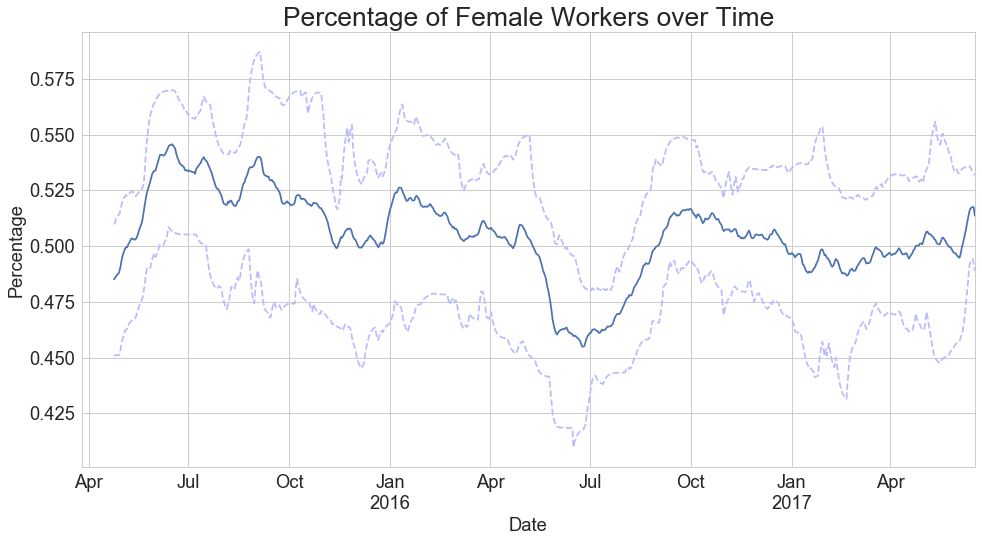

In [27]:
time_plot(data = gender_table['female'], 
          title = 'Percentage of Female Workers over Time', 
          filename = 'plots/gender-female.pdf', 
          confidence=True)

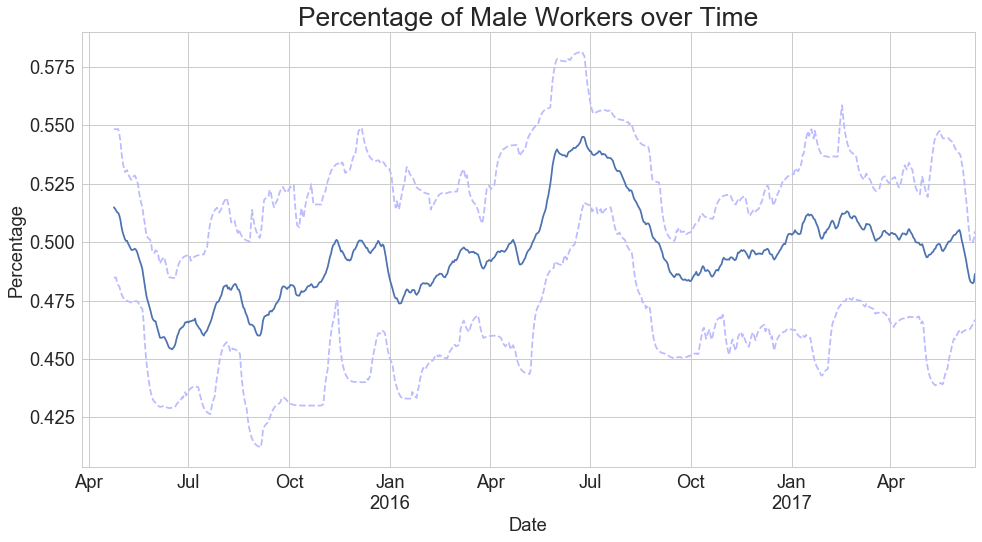

In [28]:
time_plot(data = gender_table['male'], 
          title = 'Percentage of Male Workers over Time', 
          filename = 'plots/gender-male.pdf', 
          confidence=True)

### Gender by Country

In [29]:
gender_table_us = pd.crosstab(index=df[df.location_country=='US'].date, columns=df[df.location_country=='US'].gender, 
                            values='worker_id', aggfunc=np.count_nonzero, normalize='index')

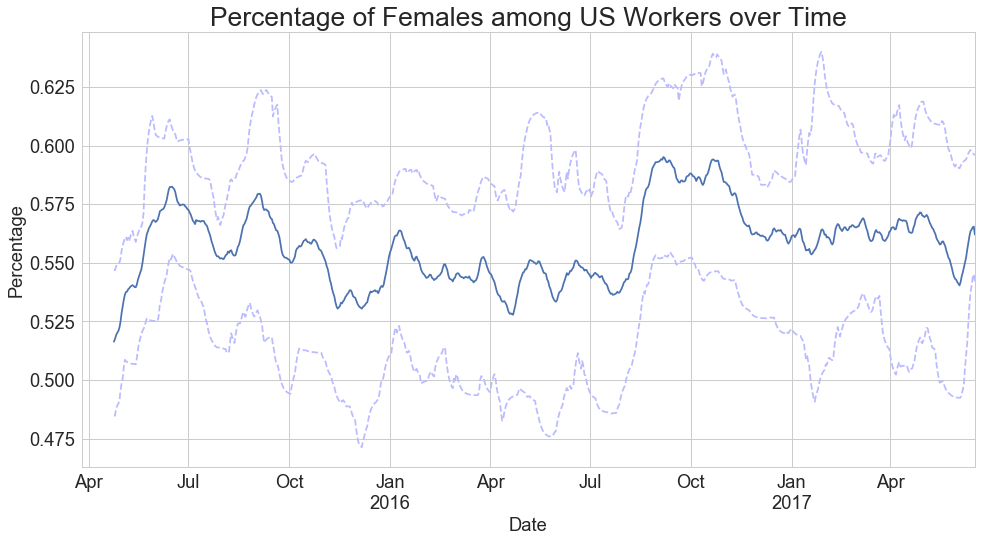

In [30]:
time_plot(data = gender_table_us['female'], 
          title = 'Percentage of Females among US Workers over Time', 
          filename = 'plots/gender-female-usa.pdf', 
          confidence=True)

In [31]:
gender_table_in = pd.crosstab(index=df[df.location_country=='IN'].date, columns=df[df.location_country=='IN'].gender, 
                            values='worker_id', aggfunc=np.count_nonzero, normalize='index')

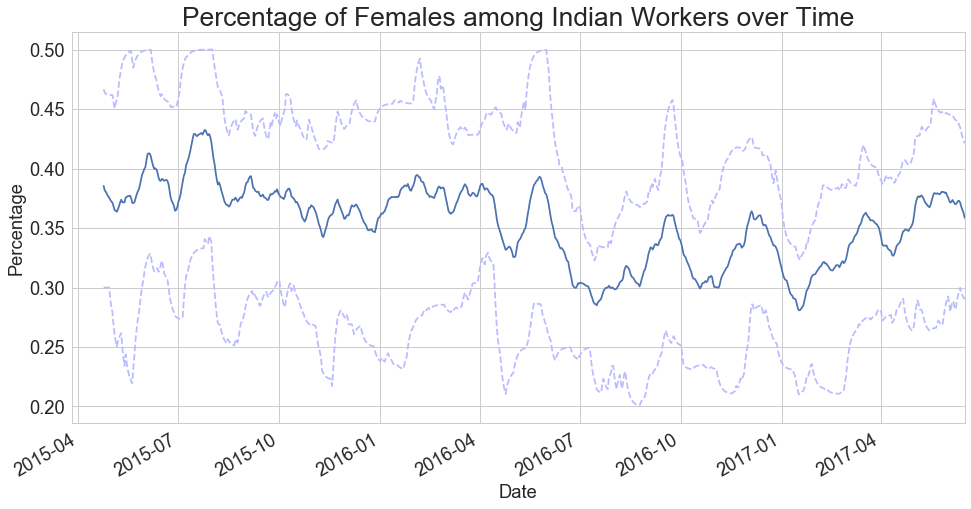

In [32]:
time_plot(data = gender_table_in['female'], 
          title = 'Percentage of Females among Indian Workers over Time', 
          filename = 'plots/gender-female-india.pdf', 
          confidence=True)

### Year of Birth

In [33]:
df['yob_decade'] = df['year_of_birth'].apply(lambda x: str(int(round(x,-1)))+'-'+str(int(round(x,-1))+9))

In [34]:
yob_table = pd.crosstab(index=df.date, columns=df.yob_decade, 
                            values='worker_id', aggfunc=np.count_nonzero, normalize='index')

In [35]:
yob_table.head(5)

yob_decade,1910-1919,1920-1929,1930-1939,1940-1949,1950-1959,1960-1969,1970-1979,1980-1989,1990-1999,2000-2009,2010-2019
date,,,,,,,,,,,
2015-03-26,0.0,0.0,0.0,0.0,0.000000,0.140000,0.080000,0.400000,0.320000,0.060000,0.0
2015-03-27,0.0,0.0,0.0,0.0,0.051546,0.103093,0.103093,0.360825,0.371134,0.010309,0.0
2015-03-28,0.0,0.0,0.0,0.0,0.010417,0.041667,0.145833,0.427083,0.354167,0.020833,0.0
2015-03-29,0.0,0.0,0.0,0.0,0.031915,0.053191,0.063830,0.404255,0.425532,0.021277,0.0
2015-03-30,0.0,0.0,0.0,0.0,0.020833,0.145833,0.104167,0.375000,0.322917,0.031250,0.0


In [36]:
yob_table.index

DatetimeIndex(['2015-03-26', '2015-03-27', '2015-03-28', '2015-03-29',
               '2015-03-30', '2015-03-31', '2015-04-01', '2015-04-02',
               '2015-04-03', '2015-04-04',
               ...
               '2017-06-08', '2017-06-09', '2017-06-10', '2017-06-11',
               '2017-06-12', '2017-06-13', '2017-06-14', '2017-06-15',
               '2017-06-16', '2017-06-17'],
              dtype='datetime64[ns]', name='date', length=815, freq=None)

In [37]:
decades = ['1970-1979', '1980-1989', '1990-1999']

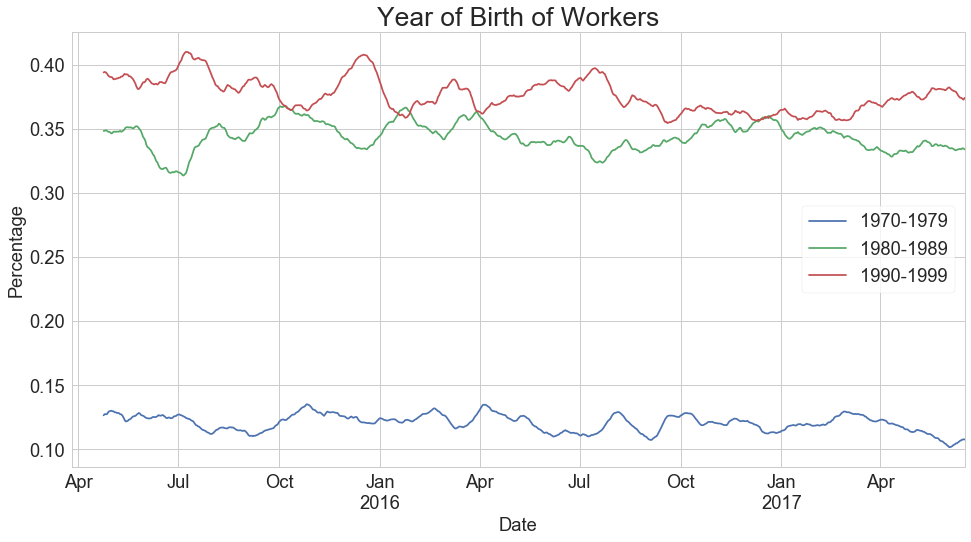

In [38]:
time_plot(yob_table[decades], "Year of Birth of Workers", 
          filename = 'plots/yearofbirth.pdf', confidence = False, legend = True)

#### Indian workers are *slightly* younger

In [39]:
data = pd.DataFrame(df[df.location_country=='IN'])
yob_table_in = pd.crosstab(index=data.date, columns=data.yob_decade, 
                            values='worker_id', aggfunc=np.count_nonzero, normalize='index')

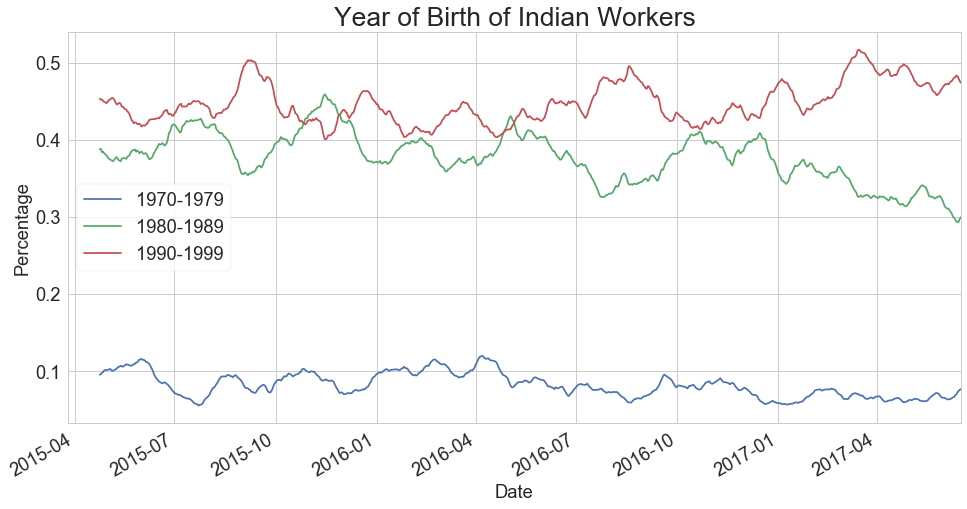

In [40]:
time_plot(yob_table_in[decades], "Year of Birth of Indian Workers", 
          'plots/yearofbirth-indian.pdf', confidence = False, legend = True)

### Marital Status

In [41]:
married_table = pd.crosstab(index=df.date, columns=df.marital_status, 
                            values='worker_id', aggfunc=np.count_nonzero, normalize='index')

In [42]:
status = set(df.marital_status)
status.discard('None')
status.discard('separated')
status.discard('widowed')
status = sorted(status)
status

['cohabitating', 'divorced', 'engaged', 'married', 'single']

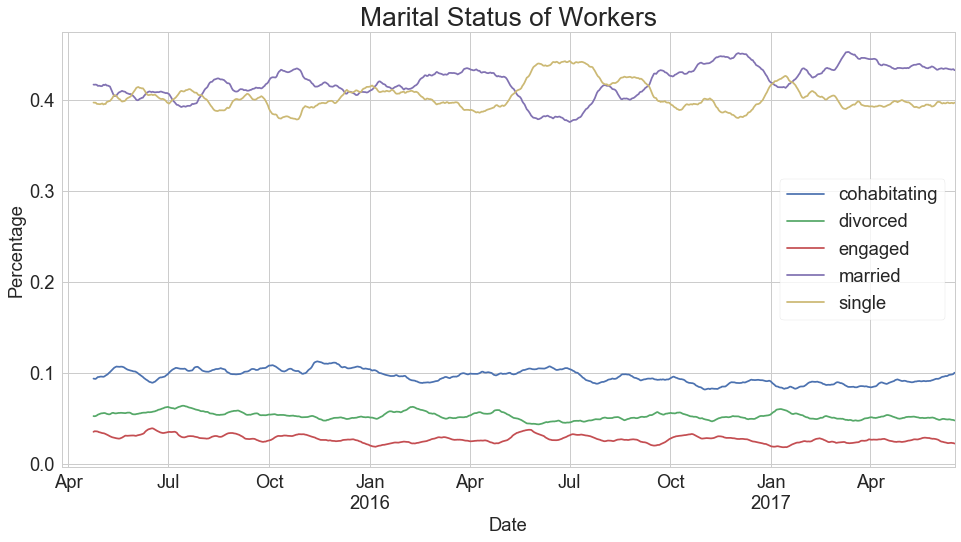

In [43]:
time_plot(married_table[status], "Marital Status of Workers", 
          'plots/marital-status.pdf', confidence = False, legend = True)

In [44]:
married_table_in = pd.crosstab(index=df[df.location_country=='IN'].date, columns=df[df.location_country=='IN'].marital_status, 
                            values='worker_id', aggfunc=np.count_nonzero, normalize='index')

In [45]:
status = set(df.marital_status)
status.discard('None')
status.discard('separated')
status.discard('widowed')
status.discard('engaged')
status.discard('divorced')
status.discard('cohabitating')
status = sorted(status)
status

['married', 'single']

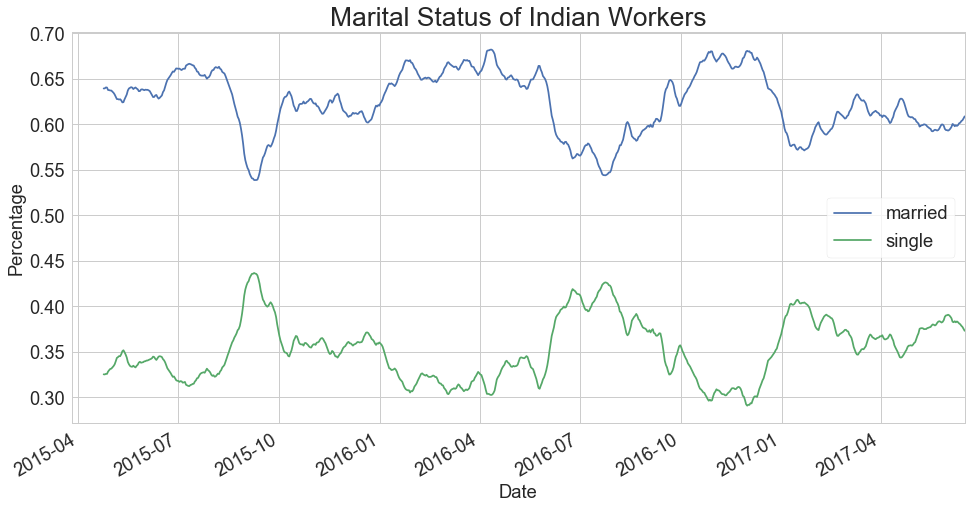

In [46]:
time_plot(married_table_in[status], "Marital Status of Indian Workers",
          'plots/marital-status-indian.pdf', confidence = False, legend = True)

### Household Size



In [47]:
hhsize_table = pd.crosstab(index=df.date, columns=df.household_size, 
                           values='worker_id', aggfunc=np.count_nonzero, normalize='index')

In [48]:
status = sorted(set(df.household_size))

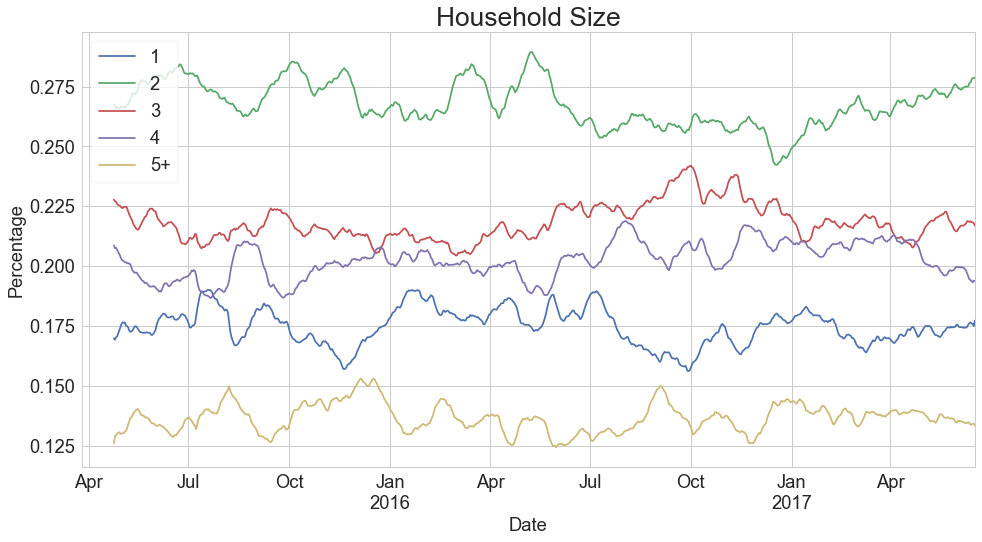

In [49]:
time_plot(hhsize_table[status], "Household Size",
          'plots/hhsize.pdf', confidence = False, legend = True)

#### HHSize for Single and Married People

In [50]:
hhsize_table = pd.crosstab(index=df.date, columns=[df.household_size, df.marital_status], 
                           values='worker_id', aggfunc=np.count_nonzero, normalize='index')

In [51]:
import itertools

marital = set(df.marital_status)
marital.discard('None')
marital.discard('separated')
marital.discard('widowed')
marital.discard('engaged')
marital.discard('divorced')
marital.discard('cohabitating')
# marital.discard('single')
marital.discard('married')


hhsize = set(df.household_size)
# hhsize.discard('1')
# hhsize.discard('2')
# hhsize.discard('3')
# hhsize.discard('4')
# hhsize.discard('5+')

status = sorted(itertools.product(hhsize, marital))
status

[('1', 'single'),
 ('2', 'single'),
 ('3', 'single'),
 ('4', 'single'),
 ('5+', 'single')]

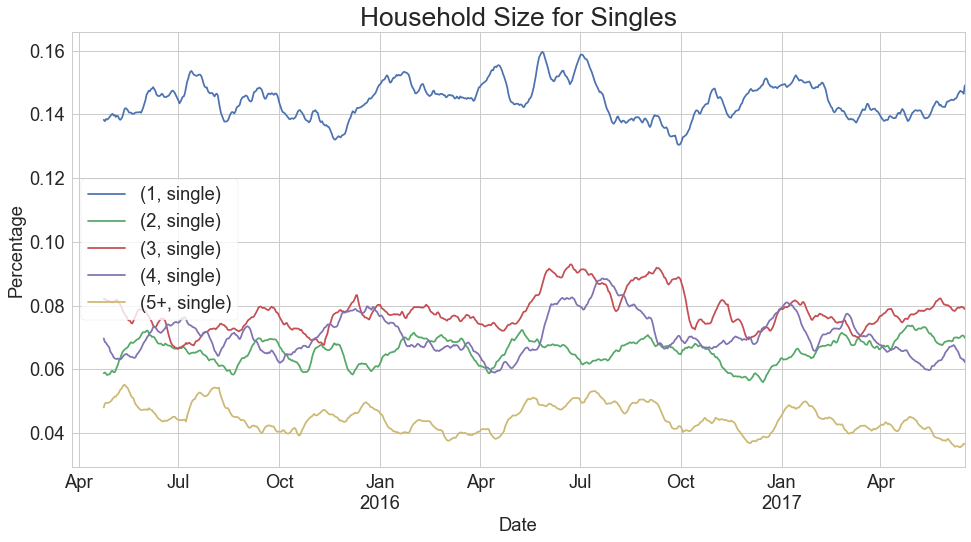

In [52]:
time_plot(hhsize_table[status], "Household Size for Singles", 'plots/hhsize-singles.pdf', confidence = False, legend = True)

In [53]:
import itertools

marital = set(df.marital_status)
marital.discard('None')
marital.discard('separated')
marital.discard('widowed')
marital.discard('engaged')
marital.discard('divorced')
marital.discard('cohabitating')
marital.discard('single')
# marital.discard('married')


hhsize = set(df.household_size)
# hhsize.discard('1')
# hhsize.discard('2')
# hhsize.discard('3')
# hhsize.discard('4')
# hhsize.discard('5+')

status = sorted(itertools.product(hhsize, marital))
status

[('1', 'married'),
 ('2', 'married'),
 ('3', 'married'),
 ('4', 'married'),
 ('5+', 'married')]

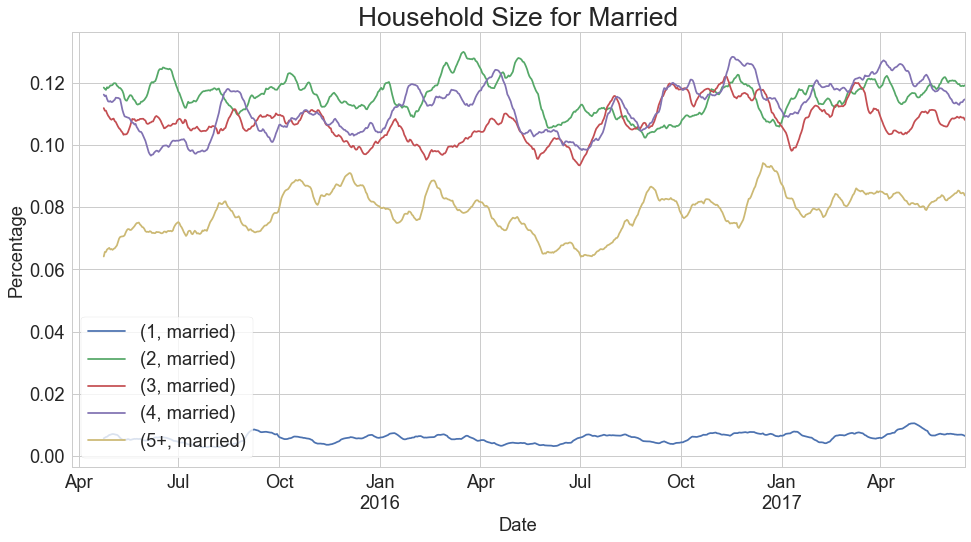

In [54]:
time_plot(hhsize_table[status], "Household Size for Married", 'plots/hhsize-married.pdf', confidence = False, legend = True)

### Household Income

In [55]:
hhincome_table = pd.crosstab(index=df.date, columns=df.household_income, 
                           values='worker_id', aggfunc=np.count_nonzero, normalize='index')

status = sorted(set(df.household_income))

# Reconfiguring the order
status[0],  status[1], status[7] = status[7], status[0], status[1]
status

['Less than $10,000',
 '$10,000-$14,999',
 '$15,000-$24,999',
 '$25,000-$39,999',
 '$40,000-$59,999',
 '$60,000-$74,999',
 '$75,000-$99,999',
 '$100,000 or more']

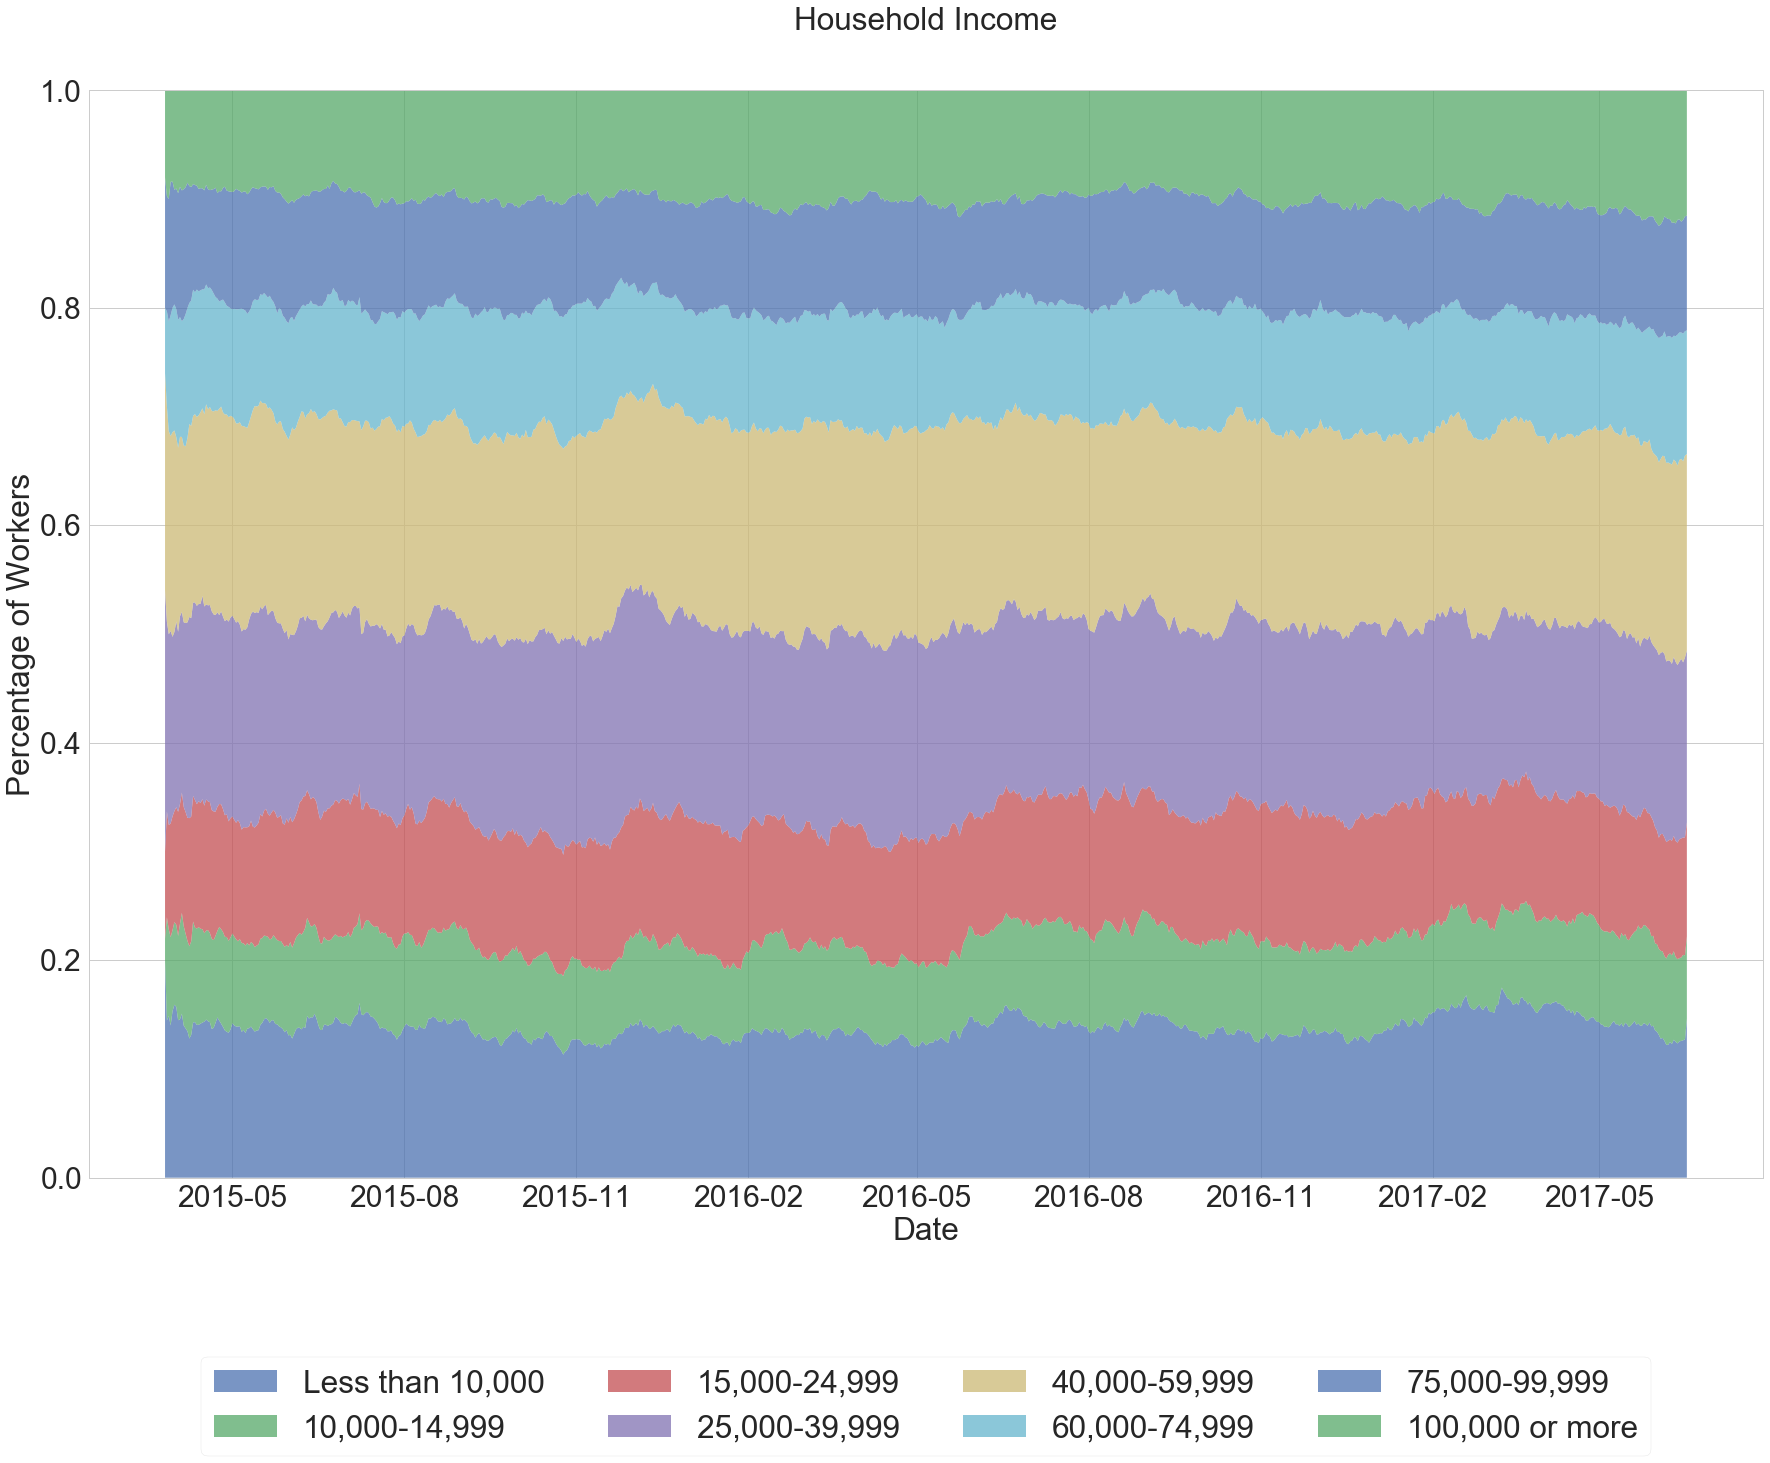

In [56]:
fm = hhincome_table[sorted(status)].ewm(span=30).mean()
fs = hhincome_table[sorted(status)].ewm(span=30).std() 
plt.figure(figsize = (30,20))
plt.tick_params(labelsize=30)

incomes = [fm[d] for d in status]

plt.stackplot(fm.index, incomes, alpha=0.75)
plt.ylim([0.0,1.0])

ax = plt.gca()
ax.set_title("Household Income", fontsize='x-large', y=1.05)
ax.set_ylabel("Percentage of Workers", fontsize='x-large')
ax.set_xlabel("Date", fontsize='x-large')


legend = []
for stat in status:
    s = stat.replace('$','')
    legend.append(s)
    
ax.legend(legend, fontsize='x-large', fancybox=True, frameon = True, loc="upper center", ncol=4, 
         bbox_to_anchor=(0.5, -0.15))